# Dropout

I modified the code that is brought from the following reference: https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/503_dropout.py

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(42)

In [2]:
N_SAMPLES = 20
N_HIDDEN = 300

In [3]:
# training data
x = torch.linspace(-1, 1, N_SAMPLES).unsqueeze(dim=1)
y = x + 0.5 * torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# test data
test_x = torch.linspace(-1, 1, N_SAMPLES).unsqueeze(dim=1)
test_y = test_x + 0.5 * torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

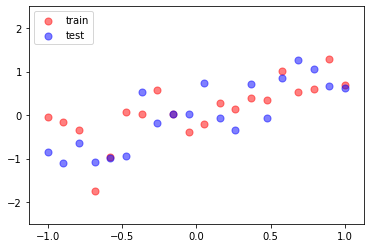

In [4]:
# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='red', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='blue', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [5]:
class Regressor_ofit(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1, N_HIDDEN),
            nn.ReLU(),
            nn.Linear(N_HIDDEN, N_HIDDEN),
            nn.ReLU(),
            nn.Linear(N_HIDDEN, 1),
        )
        
    def forward(self, x):
        return self.network(x)

class Regressor_dout(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1, N_HIDDEN),
            torch.nn.Dropout(0.5),  # drop 50% of the neuron
            nn.ReLU(),
            nn.Linear(N_HIDDEN, N_HIDDEN),
            torch.nn.Dropout(0.5),  # drop 50% of the neuron
            nn.ReLU(),
            nn.Linear(N_HIDDEN, 1),
        )
        
    def forward(self, x):
        return self.network(x)

In [6]:
regressor_ofit = Regressor_ofit()
optimizer_ofit = torch.optim.Adam(regressor_ofit.parameters(), lr=0.01)

regressor_dout = Regressor_dout()
optimizer_dout = torch.optim.Adam(regressor_dout.parameters(), lr=0.01)

loss_func = torch.nn.MSELoss()

In [7]:
print(regressor_ofit)  # net architecture
print(regressor_dout)

Regressor_ofit(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): ReLU()
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Regressor_dout(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=300, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=300, bias=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=300, out_features=1, bias=True)
  )
)


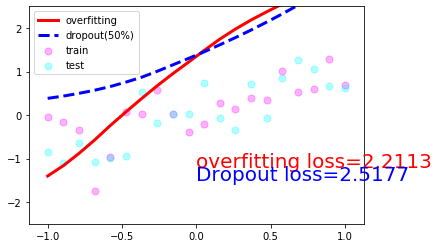

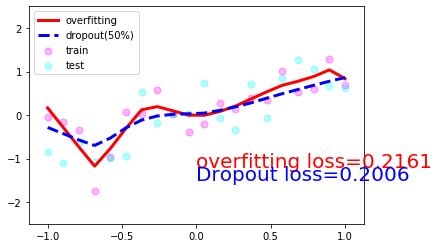

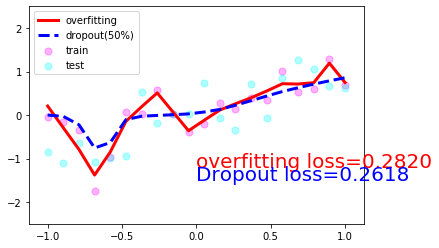

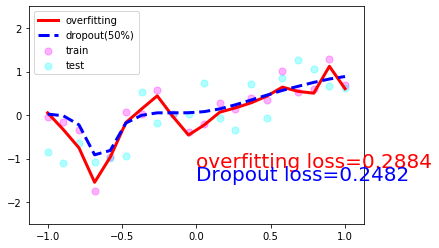

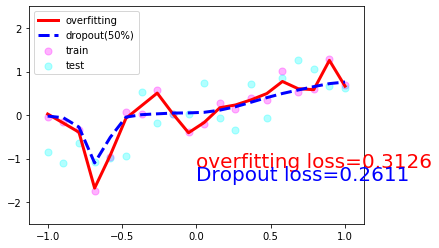

In [8]:
for t in range(500):
    regressor_ofit.train()
    regressor_dout.train()

    pred_ofit = regressor_ofit(x)
    loss_ofit = loss_func(pred_ofit, y)

    pred_dout = regressor_dout(x)
    loss_dout = loss_func(pred_dout, y)

    optimizer_ofit.zero_grad()
    optimizer_dout.zero_grad()
    loss_ofit.backward()
    loss_dout.backward()
    optimizer_ofit.step()
    optimizer_dout.step()

    if t % 100 == 0:
        with torch.no_grad():
            regressor_ofit.eval()
            regressor_dout.eval()

            # plotting
            plt.cla()
            test_pred_ofit = regressor_ofit(test_x)
            test_pred_dout = regressor_dout(test_x)
            plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
            plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
            plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
            plt.plot(test_x.data.numpy(), test_pred_dout.data.numpy(), 'b--', lw=3, label='dropout(50%)')
            plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).item(), fontdict={'size': 20, 'color':  'red'})
            plt.text(0, -1.5, 'Dropout loss=%.4f' % loss_func(test_pred_dout, test_y).item(), fontdict={'size': 20, 'color': 'blue'})
            plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

            plt.show()